**Music and Lyrics by:** 
<p> Νικόλαος Τασιόπουλος 03118858
<p> Ναταλία-Μαρία Γρηγοριάδου 03118940

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 1α**
Στο θέμα αυτό θα αναπτύξετε έναν γράφο γνώσης τον οποίο στη συνέχεια θα αξιοποιήσετε για ένα σύστημα συστάσεων (recommender system) που θα προτείνει μουσικά κομμάτια σε χρήστες.


Η παράδοση του θέματος θα γίνει μετά το πέρας της καμπάνιας όπου και θα σχηματιστεί το εμπλουτισμένο σύνολο δεδομένων (new_songs.csv). Το μη εμπλουτισμένο σύνολο (songs.csv) σας δίνεται για την εξοικείωσή σας με τις τεχνολογίες που θα χρησιμοποιήσετε.

## 1ο Μέρος: Εξοικείωση με το προγραμματιστικό περιβάλλον


Σε αυτό το μέρος θα δούμε πώς μπορούμε να δημιουργήσουμε και να εμπλουτίσουμε ένα γράφο γνώσης, να συνδέσουμε πολλαπλούς γράφους καθώς και να διατυπώνουμε SPARQL ερωτήματα, μέσα από το προγραμματιστικό περιβάλλον του notebook.

Σας δίνεται ένας πολύ απλός γράφος γνώσης στο αρχείο vivaldi.nt, ο οποίος αποτελείται από τις παρακάτω τριάδες.

```xml
<http://example.org/ns/496_MIL0882058> <http://example.org/props/publisher> <http://example.org/ns/Virgin_Classics> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/year> "2011"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/title> "La_Stravaganza"^^<http://www.w3.org/2001/XMLSchema#string> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/year> "2010"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/title> "La follia_:_Sonate_per_violino_vivaldi"^^<http://www.w3.org/2001/XMLSchema#string>.
<http://example.org/ns/496_LO11367666> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/publisher> <http://example.org/ns/Sony_Music_Entertainment> .
```
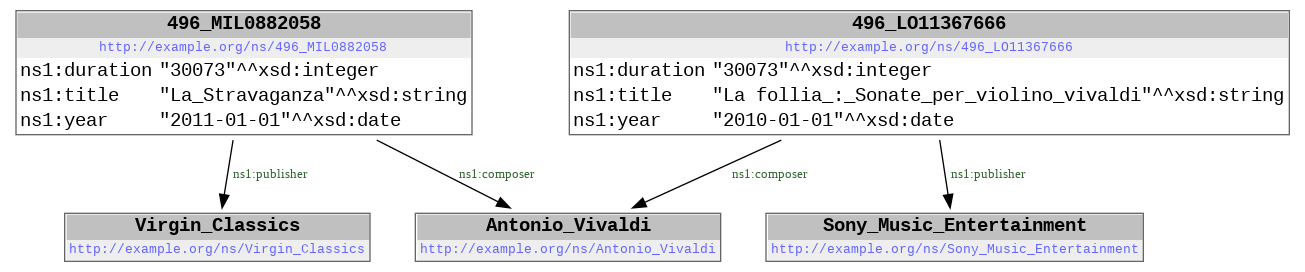

Ο γράφος αυτός περιέχει πληροφορίες για δύο μουσικά κομμάτια, την δισκογραφική που τα κυκλοφόρησε και τον συνθέτη τους. Χρησιμοποιεί δύο 'τεχνητούς' χώρους ονομάτων: http://example.org/ns/ και http://example.org/props/ όπου στον πρώτο ορίζονται τα ονόματα των οντοτήτων ενώ στο δεύτερο τα ονόματα των ιδιοτήτων τους.

Στην python μπορούμε να φορτώσουμε το γράφο με χρήση της βιβλιοθήκης rdflib.

In [1]:
!pip install rdflib

In [2]:
from rdflib import Graph, Literal, URIRef, Namespace
## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('vivaldi.nt',format='nt')

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
2011-01-01
http://example.org/ns/496_LO11367666
http://example.org/ns/Antonio_Vivaldi
La_Stravaganza
30073
La follia_:_Sonate_per_violino_vivaldi
2010-01-01
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/496_MIL0882058
http://example.org/ns/Virgin_Classics


Στο γράφο αυτό μπορούμε να διατυπώνουμε SPARQL ερωτήματα όπως φαίνεται στο παρακάτω κελί. 

Ποια μουσικά κομμάτια έχει συνθέσει ο Antonio Vivaldi?

In [3]:
## Τα prefixes τα ορίζουμε στην αρχή του ερωτήματος για να μην κουβαλάμε τα namespaces μέσα στο ερώτημα
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:composer ex:Antonio_Vivaldi .
          ?song exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('La_Stravaganza', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('La follia_:_Sonate_per_violino_vivaldi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Στο γράφο επίσης μπορούμε να προσθέσουμε τριάδες

π.χ. για να προσθέσουμε το γεγονός πως ο Antonio Vivaldi γεννήθηκε το 1678-03-04.

In [4]:
from rdflib.namespace import XSD
## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI του συνθέτη
a = URIRef(ns1+"Antonio_Vivaldi")

## URI της ιδιότητας "ημερομηνία γέννησης"
b = URIRef(ns2+"date_of_birth")

## URI της ημερομηνίας γέννησης
c = Literal("1678-03-04", datatype = XSD.date)
## Προσθήκη της τριάδας a,b,c στο γράφο
g.add((a,b,c))

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for a,b,c in g:
  print((a,b,c))

All nodes of the graph:
(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'), rdflib.term.URIRef('http://example.org/props/duration'), rdflib.term.Literal('30073', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))
(rdflib.term.URIRef('http://example.org/ns/496_LO11367666'), rdflib.term.URIRef('http://example.org/props/composer'), rdflib.term.URIRef('http://example.org/ns/Antonio_Vivaldi'))
(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'), rdflib.term.URIRef('http://example.org/props/publisher'), rdflib.term.URIRef('http://example.org/ns/Virgin_Classics'))
(rdflib.term.URIRef('http://example.org/ns/496_LO11367666'), rdflib.term.URIRef('http://example.org/props/duration'), rdflib.term.Literal('30073', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))
(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'), rdflib.term.URIRef('http://example.org/props/year'), rdflib.term.Literal('2011-01-01', datatype=rdflib.term.URIRef

Παρατηρήστε πως ο κόμβος που αναφέρεται στην οντότητα του κομματιού έχει URI <<http://example.org/ns/496_MIL0882058>> και όχι <<http://example.org/ns/La_Stravaganza>>. Ο τίτλος ενός μουσικού κομματιού είναι ένα string (literal) το οποίο συνδέεται με τον αντίστοιχο κόμβο μέσω της ακμής <<http://example.org/props/title>>. Αν χρειαζόταν να βρούμε το όνομα του συγκεκριμένου κόμβου θα μπορούσαμε να το κάνουμε μέσω SPARQL

In [5]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
       WHERE {
          ?song exp:title "La_Stravaganza"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'),)


όπου το ^^xsd:string υποδηλώνει πως αναφερόμαστε σε literal τύπου string

### Ερώτημα 1.1

Δημιουργήστε έναν νέο γράφο γνώσης (g2) από πληροφορίες που θα βρείτε ψάχνοντας στο αρχείο songs.csv, όμοιο με αυτόν που σας δίνεται, στον οποίο:
- Θα χρησιμοποιούνται τα ίδια namespaces με τον γράφο που δίνεται
- Θα περιέχονται 10 με 20 τριάδες
- Θα περιέχονται τουλάχιστον δύο μουσικά κομμάτια διαφορετικά από αυτά που περιέχονται στο γράφο που δίνεται
- Τουλάχιστον ένας κόμβος του γράφου θα έχει ίδιο URI με έναν κόμβο του γράφου που δίνεται, δηλαδή θα αναφέρεται στο ίδιο αντικείμενο του κόσμου (πχ ένας συνθέτης ή μια δισκογραφική) 

Στη συνέχεια θα διατυπώσετε δύο SPARQL ερωτήματα της επιλογής σας στο γράφο αυτόν, και θα εκτυπώσετε τις απαντήσεις. Περιγράψτε τι κάνει το κάθε ένα από αυτά τα ερωτήματα.

Μπορείτε να δημιουργήσετε το γράφο είτε μέσω του κώδικα όπως δείξαμε και παραπάνω, είτε δημιουργώντας τοπικά ένα αρχείο 'ntriples' (.nt), γράφοντας "με το χέρι" τις τριάδες με τη μορφή που είναι και στο vivaldi.nt,  και μετά φορτώνοντας το αρχείο στο notebook, όπως παρουσιάσαμε και για το δοθέν αρχείο (Graph.parse()). Σε περίπτωση που δημιουργήσετε το νέο γράφο μέσω κώδικα, μην ξεχάσετε να αποθηκεύσετε το γράφο σε ένα αρχείο με κωδικοποίηση 'ntriples' τρέχοντας την εντολή
```python
g2.serialize(destination='mygraph.nt', format='nt')
```
Εκτυπώστε όλες τις τριάδες του γράφου.

**Προσοχή:** Τα κενά και ορισμένοι ειδικοί χαρακτήρες ('/') ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.

In [6]:
import pandas as pd
df = pd.read_csv('songs.csv').drop("Unnamed: 0", axis=1)
df.head() 

# get the 78 item in the column
row = df.iloc[78]
print(row['Europeana ID'])

446/MIL0883143


In [19]:
def fix_str(old_str):
    if(old_str[-1] == " "):
        new_str = old_str[:-1]
    else:
        new_str = old_str
    new_str = new_str.replace("/", "_")
    new_str = new_str.replace(" ", "_")
    new_str = new_str.replace("(", "-")
    new_str = new_str.replace(")", "-")
    new_str = new_str.replace("'", "")
    new_str = new_str.replace('"', "")
    new_str = new_str.replace(".", "")
    return new_str

In [20]:
from rdflib import Graph, Literal, URIRef, Namespace

## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

# iterate over the first 10 rows of the dataframe
for index, row in df.head(3).iterrows():
    # print(row['Europeana ID'])
    # Ορίζουμε το URI του κομματιού απο το Europeana
    a = URIRef(ns1+fix_str(row['Europeana ID']))
    # Ορίζουμε το κατηγόρημα του κομματιού
    for predicate in df.columns.values[1:]:
        # Μετετραψε σε μικρά γράμματα
        predicate_for_b = predicate.lower()
        b = URIRef(ns2+(predicate_for_b))
        # Ορίζουμε την τιμή της ιδιότητας
        # print(row[predicate], type(row[predicate]))
        value = fix_str(str(row[predicate]))
        if (value != 'nan'):
            c = URIRef(ns1+value)
            g.add((a,b,c))
# find a similar song (same composer) and add it to the graph
similar_song = df.iloc[78]
# print(row['Europeana ID'])
# Ορίζουμε το URI του κομματιού απο το Europeana
a = URIRef(ns1+fix_str(similar_song['Europeana ID']))
# Ορίζουμε το κατηγόρημα του κομματιού
for predicate in df.columns.values[1:]:
    
    predicate_for_b = predicate.lower()
    b = URIRef(ns2+(predicate_for_b))
    # Ορίζουμε την τιμή της ιδιότητας
    # print(row[predicate], type(row[predicate]))
    value = fix_str(str(similar_song[predicate]))
    
    if (value != 'nan'):
            c = URIRef(ns1+value)
            g.add((a,b,c))



In [21]:
## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/30000
http://example.org/ns/1901-01-27
http://example.org/ns/2011
http://example.org/ns/Giuseppe_Verdi
http://example.org/ns/2059210_data_sounds_http___archive_org_download_mickthomas2010_01_01_zoomh2_flac16_mickthomas2010_01_01t06_mp3
http://example.org/ns/2010
http://example.org/ns/Set_me_free_:_ten_years_after
http://example.org/ns/Warner_Music
http://example.org/ns/Australia
http://example.org/ns/Giuseppe_Fortunino_Francesco_Verdi_-9_or_10_October_1813_–_27_January_1901-_was_an_Italian_Romantic_composer_primarily_known_for_his_operas_He_is_considered,_together_with_Richard_Wagner,_the_preeminent_opera_composer_of_the_nineteenth_century_Verdi_dominated_the_Italian_opera_scene_after_the_eras_of_Bellini,_Donizetti_and_Rossini_His_works_are_frequently_performed_in_opera_houses_throughout_the_world_and,_transcending_the_boundaries_of_the_genre,_some_of_his_themes_have_long_since_taken_root_in_popular_culture,_as_La_donna_è_mobile_from_Rigole

In [22]:
# save the file
g.serialize('songs.nt',format='nt', encoding='utf-8')


<Graph identifier=N00af54e63c1f46c3ab9c562b80b1c120 (<class 'rdflib.graph.Graph'>)>

In [23]:
#SPARQL queries
# Get the songs with composer "Antonio_Vivaldi"
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
       WHERE {
          ?song exp:composer ex:Antonio_Vivaldi .
       }""")
print("songs with vivaldi:")
for a in ans:
    print(a)
# Get the songs with publisher "Testament"
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      SELECT DISTINCT ?song
        WHERE {
          ?song exp:publisher ex:Testament .
        }""")
print("songs with Testament:")
for a in ans:
    print(a)


songs with vivaldi:
(rdflib.term.URIRef('http://example.org/ns/446_MIL0883143'),)
songs with Testament:
(rdflib.term.URIRef('http://example.org/ns/9200369_webclient_DeliveryManager_pid_7649526_custom_att_2_simple_viewer'),)


### Ερώτημα 1.2

Σε έναν νέο γράφο θα φορτώσετε και τα δύο αρχεία (mygraph.nt, vivaldi.nt) και θα διατυπώσετε ένα SPARQL ερώτημα στην απάντηση του οποίου να φαίνεται πως οι δύο γράφοι είναι συνδεδεμένοι.

Για να φορτώσετε δύο αρχεία στον ίδιο γράφο τρέχετε τις εντολές
```
g = Graph()
g.parse('vivaldi.nt',format='nt')
g.parse('mygraph.nt',format='nt')
```

In [24]:
## Απάντηση 1.2
g = Graph()
g.parse('songs.nt', format='nt')
g.parse('vivaldi.nt', format='nt')


ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
       WHERE {
          ?song exp:composer ex:Antonio_Vivaldi .
       }""")
print("songs with vivaldi:")
for a in ans:
    print(a)

songs with vivaldi:
(rdflib.term.URIRef('http://example.org/ns/446_MIL0883143'),)
(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'),)
(rdflib.term.URIRef('http://example.org/ns/496_LO11367666'),)


## 2o Μέρος: Ανάπτυξη γράφου γνώσης





Σε αυτό το μέρος θα αναπτύξετε το γράφο γνώσης που θα χρησιμοποιηθεί για το σύστημα συστάσεων, αξιοποιώντας ετερογενή δεδομένα από διαφορετικές πηγές. Συγκεκριμένα θα συλλέξετε δεδομένα από:
- Το αρχείο songs.csv που σας δίνεται
- Το γράφο γνώσης [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Για την εξαγωγή πληροφορίας από το csv αρχείο μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

Εδώ να σημειώσουμε ξανά ότι θα σας δοθεί σε δεύτερο χρόνο το εμπλουτισμένο αρχείο new_songs.csv το οποίο θα προκύψει από τη διαδικασία crowdsourcing του θέματος 1β. Με βάση αυτό το αρχείο θα πρέπει να παραδώσετε το τελικό σας θέμα.

In [25]:
import pandas as pd
df = pd.read_csv('songs.csv').drop("Unnamed: 0", axis=1)
df.head(10)

,Europeana ID,Title,Year,Duration,Composer,DateOfBirth,DateOfDeath,Biography,Publisher,Place
0,2059210/data_sounds_http___archive_org_downloa...,Selling the Cool Car For You,2012,237819,Mick Thomas,1960-02-07,NaN,"Michael James Thomas (born 7 February 1960, Ya...",NaN,Australia
1,9200369/webclient_DeliveryManager_pid_7649526_...,I vespri siciliani,2007,30000,Giuseppe Verdi,1813-10-10,1901-01-27,Giuseppe Fortunino Francesco Verdi (9 or 10 Oc...,Testament,Britain
2,446/MIL0869097,Set me free : ten years after,2010,30073,Max Iannantuono,NaN,NaN,NaN,Edel,NaN
3,496/MOD1575994,Sulla strada,2009,30073,Massimo Priviero,NaN,NaN,NaN,Universal Music,NaN
4,9200369/webclient_DeliveryManager_pid_9796872_...,Verklarte Nacht op. 4 ; Pelleas und Melisande ...,1998,30049,Arnold Schönberg,NaN,NaN,NaN,Deutsche Grammophon,Berlin
5,446/MIL0882053,Messa da requiem,2010,30073,Giuseppe Verdi,1813-10-10,1901-01-27,Giuseppe Fortunino Francesco Verdi (9 or 10 Oc...,Sony Music Entertainment,NaN
6,2059210/data_sounds_http___archive_org_downloa...,90 MPH In A 30 Mile Zone,2011,195918,Kevn Kinney,NaN,NaN,"Kevin Kinney, known professionally as Kevn Kin...",NaN,Greece
7,446/UBO3784622,A sangue freddo,2009,30073,Il Teatro degli Orrori,NaN,NaN,NaN,Universal Music,NaN
8,2059210/data_sounds_http___archive_org_downloa...,Circles,2007,186410,Camper Van Beethoven,NaN,NaN,Camper Van Beethoven is an American alternativ...,NaN,NaN
9,496/MIL0881266,"Con tutta la rabbia, con tutto l'amore",2011,30073,Giorgio Gaber,1939-01-25,2003-01-01,"Giorgio Gaber, byname of Giorgio Gaberscik (25...",Carosello,NaN


Με την παραπάνω εντολή φορτώσαμε το περιεχόμενο του αρχείου σε ένα *dataframe* το οποίο είναι ουσιαστικά ένας πίνακας. Κάθε στήλη του πίνακα είναι ένα pandas Series - ουσιαστικά μια λίστα. Για να πάρουμε το i-οστό στοιχείο μιας στήλης μπορούμε να γράψουμε (πχ. για τη στήλη 'composer'):
```python
composer = df['Composer'][i]
```
Για να πάρουμε πχ. όλα τα ζεύγη μουσικών κομματιών και συνθετών θα γράφαμε:
```python
for i in range(df.shape[0]):
  song = df['Title'][i]
  composer = df['Composer'][i]
```
Τέλος μπορούμε να φιλτράρουμε ένα dataframe και να κρατήσουμε όσες γραμμές του πίνακα ικανοποιούν κάποια συνθήκη. πχ για να πάρουμε όλες τις γραμμές που αναφέρονται σε κομμάτια που περιέχουν το EMI Classics στις δισκογραφικές:

```python
df_EMI = df[df['publisher'].str.contains('EMI Classics')]
```

Γενικά τα pandas είναι μια πολύ δυνατή βιβλιοθήκη με πάρα πολλές λειτουργίες, και θα βρείτε πολύ υλικό στο διαδίκτυο (documentation, tutorials, παραδείγματα) εάν θέλετε να το ψάξετε παραπάνω.

### Ερώτημα 2.1

Κατασκευάστε έναν γράφο γνώσης για όλα τα μουσικά κομμάτια και με όλες τις πληροφορίες που υπάρχουν στο αρχείο songs.csv που σας δίνεται.

*Προσοχή 1: Σε κάποια πεδία του csv δεν υπάρχουν καταχωρήσεις. Θα πρέπει να γίνεται έλεγχος και να το χειριστείτε κατάλληλα.*   
*Προσοχή 2: Τα κενά και ορισμένοι ειδικοί χαρακτήρες ("/", " ' ") ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.*   

In [26]:
# Απάντηση 2.1
## Read csv and create rdf
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD
g = Graph()
songs = pd.read_csv('songs.csv')

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

for index, row in df.iterrows():
    # print(row['Europeana ID'])
    # Ορίζουμε το URI του κομματιού απο το Europeana
    a = URIRef(ns1+fix_str(row['Europeana ID']))
    # Ορίζουμε το κατηγόρημα του κομματιού
    for predicate in df.columns.values[1:]:
        # Μετετραψε σε μικρά γράμματα
        predicate_for_b = predicate.lower()
        b = URIRef(ns2+(predicate_for_b))
        # Ορίζουμε την τιμή της ιδιότητας
        # print(row[predicate], type(row[predicate]))
        value = fix_str(str(row[predicate]))
        # check if the value is rubbish
        if (value != 'nan'):
            c = URIRef(ns1+value)
            g.add((a,b,c))
g.serialize('all_songs.ttl',format='ttl', encoding='utf-8')
g.serialize('all_songs.nt',format='nt', encoding='utf-8')

<Graph identifier=Ne8883c7f50564ad5972f3293e5da8f58 (<class 'rdflib.graph.Graph'>)>

### Ερώτημα 2.2


Για την ανάκτηση πληροφορίας από το γράφο των Wikidata θα κάνετε SPARQL queries στο SPARQL endpoint που διαθέτουν. Συγκεκριμένα μέσω της βιβλιοθήκης requests της python, θα στέλνετε ένα http GET request με δύο παραμέτρους:  

*   '*format*' που καθορίζει σε τί μορφή θα έρθει η απάντηση (json), και
*   '*query*' που περιέχει το SPARQL ερώτημα που θέλουμε να απαντηθεί.

Για παράδειγμα το παρακάτω κομμάτι κώδικα δημιουργεί το κατάλληλο SPARQL query και "χτυπάει" το Wikidata SPARQL endpoint για να πάρουμε όλους τους κόμβους του γράφου που έχουν σε κάποιο από τα αγγλικά (@en) labels τους (skos:altLabel|skos:prefLabel|rdfs:label) τη συμβολοσειρά "Wolfgang Amadeus Mozart". 

Προσοχή! τα labels είναι case sensitive και απαιτούν να προσδιορίζεται και η γλώσσα του label, π.χ. εδω Αγγλικά (@en)! 

In [27]:
import requests

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Wolfgang Amadeus Mozart\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})


Ύστερα, για να πάρουμε τις απαντήσεις διαβάζουμε το json που επεστράφη:

In [28]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q254


Μπορείτε να κάνετε δοκιμές για τα SPARQL queries προς Wikidata στο [Wikidata Query Service](https://query.wikidata.org/). 

**Χρήσιμοι σύνδεσμοι:**

[Wikidata:SPARQL query service](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service) και όλοι οι σύνδεσμοι που βρίσκονται στο κομμάτι "Learning SPARQL", με κυριότερους τους:

[SPARQL Tutorial](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)

[SPARQL query service/queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries) 

[SPARQL query service/queries/examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

Όμοια τώρα με τη συμβολοσειρά "Giuseppe Verdi".

In [29]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [30]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

12
http://www.wikidata.org/entity/Q3771609
http://www.wikidata.org/entity/Q7317
http://www.wikidata.org/entity/Q1768473
http://www.wikidata.org/entity/Q3771608
http://www.wikidata.org/entity/Q3771610
http://www.wikidata.org/entity/Q52808313
http://www.wikidata.org/entity/Q52824268
http://www.wikidata.org/entity/Q52831519
http://www.wikidata.org/entity/Q52832471
http://www.wikidata.org/entity/Q52856219
http://www.wikidata.org/entity/Q52942600
http://www.wikidata.org/entity/Q52989468


####2.2.1 Ποιά βασική διαφορά παρατηρείτε ως προς το σύνολο απαντήσεων για την περίπτωση της συμβολοσειράς Wolfgang Amadeus Mozart και Giuseppe Verdi αντίστοιχα;  

Απάντηση 2.2.1: 
* Wolfgan : 1 ο συνθέτης . 
* Verdi: 12 ( συνθετης, 3 ταινίες και 8 σχολεία )

####2.2.2 Εάν ψάχναμε (μόνο) την οντότητα του  συνθέτη Wolfgang Amadeus Mozart το παραπάνω query σύμφωνα με το label είναι αρκετό; Για την περίπτωση του συνθέτη Giuseppe Verdi;  
 

Απάντηση 2.2.2: 

Για την περίπτωση του Mozart ειναι αρκετό, ωστόσω οπως παρατηρήσαμε για τον Verdi θα χρειαστούμε επιπλέον label/s .

####2.2.3 Από τη σελίδα των wikidata για τον συνθέτη Giuseppe Verdi μπορείτε να εντοπίσετε κάποια χαρακτηριστικά (αναφέρονται ως Statements στη σελίδα των Wikidata) που τον διαφοροποιούν από τις υπόλοιπες οντότητες που μας επέστρεψε το παραπάνω query; Δώστε τουλάχιστον δύο (2) παραδείγματα. 

Απάντηση 2.2.3:
1. instance of == human
2. sex or gender 


####Σύνθετα Queries
Για να κάνουμε πιο σύνθετα ερωτήματα πρέπει να ξέρουμε τα αναγνωριστικά των ιδιοτήτων και των κόμβων όπως είναι ορισμένα στα Wikidata. Αυτά μπορούμε να τα ανακτήσουμε είτε με SPARQL ερωτήματα όπως το παραπάνω, ή ψάχνοντας "χεράτα" στα Wikidata. Για παράδειγμα η ιδιότητα "είναι" (instance of) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P31) και έχει αναγνωριστικό ([wikidata identifier](https://www.wikidata.org/wiki/Wikidata:Identifiers)) P31. Η έννοια "μουσικό είδος" (music genre) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q188451) και έχει αναγνωριστικό Q188451.  
Έτσι εάν ψάχνουμε την οντότητα του μουσικού είδους "opera" εάν κάνουμε αναζήτηση μόνο με το label θα δούμε πως επιστρέφονται μαζί κι άλλες οντότητες οι οποίες δεν μας ενδιαφέρουν αυτή τη στιγμή. Για αυτό δημιουργούμε ένα πιο σύνθετο query στο οποίο υπάρχει η απαίτηση οι οντότητες που θα επιστραφούν να "είναι" (instance of) μουσικά είδη. 

*Προσοχή στα prefixes! Χρησιμοποιούμε wd για τις οντότητες και wdt για τις ιδιότητες (see "Our first query" [here](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)), αυτά είναι τα μόνα που θα μας χρειαστούν στο πλαίσιο της παρούσας άσκησης.*

In [31]:
# Simple query by label (only)

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [32]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

3
http://www.wikidata.org/entity/Q1344
http://www.wikidata.org/entity/Q1592769
http://www.wikidata.org/entity/Q3354534


In [33]:
# More "complex" query by label and "instance of"

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            ?uri wdt:P31 wd:Q188451.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [34]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


1
http://www.wikidata.org/entity/Q1344


Σε συνέχεια των παραπάνω ερωτήσεων (2.2.1 - 2.2.3):  

#### 2.2.4. Προσπαθήστε να δημιουργήσετε ένα SPARQL query με βάση τις παρατηρήσεις σας στο 2.2.3 που να επιστρέφει μόνο την οντότητα του συνθέτη Giuseppe Verdi. 
Σε μια σελίδα wikidata μπορείτε να δείτε το αναγνωριστικό μιας εννοιας (wikidata identifier) αφήνοντας (hovering) τον κέρσορα πάνω από το όνομά της όπως εμφανίζεται στα Statements, καθώς και να πλοηγηθείτε στην αντίστοιχη σελίδα πατώντας πάνω στο όνομα-σύνδεσμο.

In [35]:
# Απάντηση 2.2.4
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            # instance of human
            ?uri wdt:P31 wd:Q5.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.5. Μπορείτε να τροποποιήσετε το αρχικό query που χρησιμοποιεί μόνο τα labels ώστε να επιστρέφεται μόνο η επιθυμητή οντότητα όπως στο 2.2.4;  

<!-- Hint for 2.2.5: "Also known as..." -> altLabel -->

#### Σχόλιο: Στην περίπτωση του συνθέτη Τζουζέπε Βέρντι , αν διορθώσουμε το label σε ελληνικά , λόγω της παγκόσμιας αναγνώρισης του, θα μας απαντήσει μόνο τον συνθέτη . Σε οποιαδήποτε άλλη περίπτωση ΔΕΝ θα μπορούσαμε να γνωρίζουμε το αποτέλεσμα του query.

In [36]:
# Απάντηση 2.2.5


endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Τζουζέπε Βέρντι\"@el .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.6 Βρείτε την έννοια του συνθέτη Igor Stravinsky στο γράφο των wikidata "χεράτα" (μέσω απλης αναζήτησης στο διαδίκτυο) και δώστε το link για την αντίστοιχη σελίδα στα wikidata.  

Απάντηση 2.2.6:

query = "https://www.wikidata.org/wiki/Q7314"

#####**Hint:** 

https://lmgtfy.app/?q=igor+stravinsky+wikidata

#### 2.2.7 Δημιουργήστε ένα ερώτημα SPARQL για να πάρετε την ίδια έννοια (του συνθέτη Igor Stravinsky) μέσω του ονόματός του (label). 


In [28]:
# Απάντηση 2.2.7
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri
            WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Stravinsky\"@en .
            
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


4
http://www.wikidata.org/entity/Q7314
http://www.wikidata.org/entity/Q47510844
http://www.wikidata.org/entity/Q64157680
http://www.wikidata.org/entity/Q79946813


#### 2.2.8 Το ερώτημα που σχηματίσατε επιστρέφει την επιθυμητή οντότητα;  
#### Επιστρέφει μόνο την επιθυμητή οντότητα;  


Απάντηση 2.2.8: 
Οχι, εμφανίζει τον συνθέτη Igor Stravinsky, 2 φωτογραφίες και 1 πίνακα. Συνολικά 4 οντότηες.

#### 2.2.9 Εάν όχι με ποιούς τρόπους θα μπορούσατε να πάρετε μόνο την επιθυμητή οντότητα; διαμορφώστε το κατάλληλο SPARQL query κι επιβεβαιώστε.  
Εάν στο προηγούμενο ερώτημα επιστρέφεται μόνο η επιθυμητή οντότητα τότε μπορείτε να παραλείψετε αυτό το ερώτημα.  


Απάντηση 2.2.9:

In [37]:
# Απάντηση 2.2.9

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri
            WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Stravinsky\"@en .
            ?uri wdt:P31 wd:Q5.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


#### 2.2.10 Υπάρχει τρόπος να πάρετε μόνο την επιθυμητή οντότητα αποκλειστικά μέσω των labels (όπως στα παραπάνω παραδείγματα με τους Giuseppe Verdi και Wolfgang Amadeus Mozart); Εάν ναι, δημιουργήστε το κατάλληλο query.  


Απάντηση 2.2.10:

In [38]:
# Απάντηση 2.2.10

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri
            WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Ίγκορ Στραβίνσκι\"@el .
            
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


Η ιδιότητα "εργάζεται" (occupation) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P106) και έχει αναγνωριστικό P106. Το επάγγελμα του συνθέτη περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q36834) και έχει αναγνωριστικό Q36834. Η ιδιότητα "χώρα πολιτογράφησης" βρίσκεται εδώ με αναγνωριστικό P27. Η χώρα "Γαλλία" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q142) με αναγνωριστικό Q142. Η ιδιότητα "έχει συνθέσει" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P86) με αναγνωριστκό P86. Η ιδιότητα "έχει κερδίσει βραβείο" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P166) με αναγνωριστικό P166, και τέλος τα βραβεία Grammy περιγράφονται [εδώ](https://www.wikidata.org/wiki/Q41254) με αναγνωριστικό Q41254.



#### 2.2.11 Δημιουργήστε ένα ερώτημα SPARQL προς το wikidata SPARQL endpoint για να πάρουμε όλους τους συνθέτες που έχουν γαλλική υπηκοότητα οι οποίοι να έχουν κερδίσει βραβείο Grammy (οποιασδήποτε κατηγορίας). Οι οντότητες που αναφέρονται παραπάνω είναι αρκετές για αυτό το ερώτημα. 
**Περιγράψτε το query που δημιουργήσατε.**



Απάντηση 2.2.11:

In [39]:
# Απάντηση 2.2.11
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?uri
            WHERE {
            # εργαζεται ως συνθέτης
            ?uri wdt:P106 wd:Q36834.
            # η χώρα πολιτογράφησης του είναι η Γαλλία
            ?uri wdt:P27 wd:Q142.
            #έχει κερδίσει Grammy
            ?uri wdt:P166 ?award.
            ?award wdt:P361 wd:Q41254.
            # {?award wdt:P31 wd:Q41254 } UNION { ?award ?p "Grammy Award"@en } UNION {?award wdt:P361 wd:Q41254}.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

6
http://www.wikidata.org/entity/Q206244
http://www.wikidata.org/entity/Q231276
http://www.wikidata.org/entity/Q471656
http://www.wikidata.org/entity/Q7314
http://www.wikidata.org/entity/Q105487
http://www.wikidata.org/entity/Q313362


#### 2.2.12 Τροποποιήστε το παραπάνω query (2.2.11) ωστε να επιστρέφει το πλήθος των συνθετών. 

In [40]:
# Απάντηση 2.2.12
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT (COUNT ( Distinct ?uri) AS ?count)
            WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?award.
            ?award wdt:P361 wd:Q41254.
            # {?award wdt:P31 wd:Q41254 } UNION { ?award ?p "Grammy Award"@en } UNION {?award wdt:P361 wd:Q41254}.
            
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(data["results"]["bindings"][0]["count"]["value"])


6


#####**Hint 1**:  

COUNT

#####**Hint 2:**

 Η απάντηση είναι 6. 
<!-- Hidden hint: use DISTINCT -->

#### 2.2.13 Τροποποιήστε το query που κατασκευάσατε στο 2.2.11 ώστε να επιστρέφει **τους τίτλους** των βραβείων Grammy.

In [34]:
# Απάντηση 2.2.13
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?award ?uri
            WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?award.
            ?award wdt:P361 wd:Q41254.
            # {?award wdt:P31 wd:Q41254 } UNION { ?award ?p "Grammy Award"@en } UNION {?award wdt:P361 wd:Q41254}.

            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print("grammy: ", entity["award"]["value"]," composer: " ,(entity["uri"]["value"]))

  # Thomas Bangalter -> 2 grammies ( Q740968, Q904528)
  # Maurice Jarre -> 2 ( grammy + categopry grammy) (Q41254, Q4376972)
  # Alexandre Desplat -> 1 (category grammy) Q4376972
  # Pierre Boulez -> 1 official grammy Q41254

9
grammy:  http://www.wikidata.org/entity/Q935843  composer:  http://www.wikidata.org/entity/Q7314
grammy:  http://www.wikidata.org/entity/Q740968  composer:  http://www.wikidata.org/entity/Q471656
grammy:  http://www.wikidata.org/entity/Q5593905  composer:  http://www.wikidata.org/entity/Q231276
grammy:  http://www.wikidata.org/entity/Q935843  composer:  http://www.wikidata.org/entity/Q206244
grammy:  http://www.wikidata.org/entity/Q5593848  composer:  http://www.wikidata.org/entity/Q7314
grammy:  http://www.wikidata.org/entity/Q1619268  composer:  http://www.wikidata.org/entity/Q7314
grammy:  http://www.wikidata.org/entity/Q3774289  composer:  http://www.wikidata.org/entity/Q7314
grammy:  http://www.wikidata.org/entity/Q4376972  composer:  http://www.wikidata.org/entity/Q105487
grammy:  http://www.wikidata.org/entity/Q4376972  composer:  http://www.wikidata.org/entity/Q313362



#### 2.2.14 Τροποποιήστε το query του 2.2.11 ώστε (από τους συνθέτες που επέστρεψε προηγουμένως) να επιστρέφει μόνο συνθέτες που έχουν κερδίσει πάνω από ένα (1) βραβείο Grammy.  


In [41]:
# Απάντηση 2.2.14
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri ?count 
            WHERE {
              {
              SELECT ?uri (Count(?award) AS ?count)
                WHERE {
                  # εργαζεται ως συνθέτης
                  ?uri wdt:P106 wd:Q36834.
                  # η χώρα πολιτογράφησης του είναι η Γαλλία
                  ?uri wdt:P27 wd:Q142.
                  #έχει κερδίσει βραβείο
                  ?uri wdt:P166 ?award.
                  # to braveio einai meros twn grammy.
                  ?award wdt:P361 wd:Q41254 .
            }
            GROUP BY ?uri

            }
            filter(?count > 1).
          }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"], entity["count"]["value"])

1
http://www.wikidata.org/entity/Q7314 4


#### 2.2.15 Τροποποιήστε το query του ερωτήματος 2.2.13 ώστε να επιστρέφει τους συνθέτες ταξινομημένους  ως προς το πλήθος των βραβείων Grammy σε φθίνουσα σειρά: πρώτος ο συνθέτης με τα περισσότερα βραβεία, καθώς και την αντίστοιχη τιμή του πλήθους των βραβείων.

In [42]:
# Απάντηση 2.2.15

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri (Count(?award) AS ?count)
                WHERE {
                  # εργαζεται ως συνθέτης
                  ?uri wdt:P106 wd:Q36834.
                  # η χώρα πολιτογράφησης του είναι η Γαλλία
                  ?uri wdt:P27 wd:Q142.
                  #έχει κερδίσει βραβείο
                  ?uri wdt:P166 ?award.
                  # to braveio einai meros twn grammy.
                  ?award wdt:P361 wd:Q41254 .
            }
            GROUP BY ?uri
            ORDER BY DESC(?count)"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"], entity["count"]["value"])

6
http://www.wikidata.org/entity/Q7314 4
http://www.wikidata.org/entity/Q471656 1
http://www.wikidata.org/entity/Q231276 1
http://www.wikidata.org/entity/Q206244 1
http://www.wikidata.org/entity/Q105487 1
http://www.wikidata.org/entity/Q313362 1


#### 2.2.16 Δημιουργήστε ένα query προς τα Wikidata το οποίο επιστρέφει τις οντότητες των συνθετών, καθώς και το όνομά τους, οι οποίοι έχουν κερδίσει έστω κι ένα βραβείο Grammy (οποιασδήποτε κατηγορίας) και έχουν συνθέσει τουλάχιστον 20 μουσικά κομμάτια, σε φθίνουσα σειρά ως προς το πλήθος των Grammy που έχουν κερδίσει. Εκτυπώστε τις οντότητες μαζί με το αντίστοιχο όνομα και τον αριθμό των μουσικών κομματιών που έχουνε συνθέσει.

In [43]:
# Απάντηση 2.2.16
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?uriLabel ?uri ?count
            WHERE {
            
            {
              SELECT ?uri (COUNT(?song) AS ?count)
                WHERE {
                  # εργαζεται ως συνθέτης
                  ?uri wdt:P106 wd:Q36834.

                  #έχει κερδίσει Grammy
                  ?uri wdt:P166 ?award.
                  ?award wdt:P361 wd:Q41254.
                  
                  #A SONG WAS COMPOSED THIS COMPOSER
                  ?song wdt:P86 ?uri.

                  }Group BY ?uri
            }
            # uri have composed over 20 songs
            filter(?count > 20).
            
            SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
            } ORDER BY DESC(?count)"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"], entity["uriLabel"]["value"], entity["count"]["value"])

81
http://www.wikidata.org/entity/Q392 Bob Dylan 930
http://www.wikidata.org/entity/Q7314 Igor Stravinsky 792
http://www.wikidata.org/entity/Q2599 Paul McCartney 464
http://www.wikidata.org/entity/Q23848 Ennio Morricone 452
http://www.wikidata.org/entity/Q317272 Alan Menken 393
http://www.wikidata.org/entity/Q269094 Richard Rodgers 332
http://www.wikidata.org/entity/Q106221 James Horner 272
http://www.wikidata.org/entity/Q111074 John Barry 256
http://www.wikidata.org/entity/Q1744 Madonna 240
http://www.wikidata.org/entity/Q1203 John Lennon 219
http://www.wikidata.org/entity/Q76364 Hans Zimmer 192
http://www.wikidata.org/entity/Q207773 Howard Shore 192
http://www.wikidata.org/entity/Q36153 Beyoncé 189
http://www.wikidata.org/entity/Q108560 A. R. Rahman 183
http://www.wikidata.org/entity/Q131285 John Williams 171
http://www.wikidata.org/entity/Q185928 Henry Mancini 171
http://www.wikidata.org/entity/Q214665 Nino Rota 168
http://www.wikidata.org/entity/Q103767 Charlie Parker 164
http://ww

### Ερώτημα 2.3
Εμπλουτίστε το γράφο που κατασκευάσατε στο προηγούμενο ερώτημα, προσθέτοντας επιπλέον πληροφορία από το γράφο των Wikidata.

Συγκεκριμένα:  
####2.3.1: Προσθέστε αρχικά όσες ημερομηνίες θανάτου και γέννησης των συνθετών υπάρχουν και μπορείτε.  
####2.3.2: Διαμορφώστε κατάλληλο SPARQL query προς το γράφο σας για να ελέγξετε πόσες ημερομηνίες βρήκατε.  
####2.3.3: Στη συνέχεια μπορείτε να προσθέσετε στο γράφο σας ό,τι πληροφορία κρίνετε εσείς σχετική και χρήσιμη, διαμορφώνοντας (τουλάχιστον 3) κατάλληλα SPARQL queries προς τα wikidata, και προσθέτοντας την αντίστοιχη πληροφορία μαζικά στο γράφο σας. Έχετε κατά νου πως ο συγκεκριμένος γράφος θα χρησιμοποιηθεί στη συνέχεια για να αναπτύξετε έναν recommender άρα να σκεφθείτε διάφορα χαρακτηριστικά που θα μπορούσαν να φανούν χρήσιμα.  

Για κάθε συνθέτη του γράφου σας μπορείτε να βρείτε την αντίστοιχη οντότητα στα wikidata μέσω κατάλληλων ερωτημάτων SPARQL μέσω του ονόματος του και της ιδιότητας "εργάζεται". Τα labels που θα γίνει η αναζήτηση συνίσταται να είναι στα αγγλικά (@en) και η ιδιότητα "εργάζεται" να έχει πολλαπλές τιμές (π.χ. composer ή musician).

*Προσοχή 1: όποια πληροφορία προσθέτετε στο γράφο πρέπει να είναι συνεπής, δηλαδή εάν εμπλουτίσετε το γράφο με νέα πληροφορία πριν δημιουργήσετε νέες οντότητες πρέπει να σιγουρευτείτε πως δεν υπάρχουν ήδη, διότι μπορεί να δημιουργήσετε ένα γράφο όπου υπάρχουν πολλά διαφορετικά ονόματα (άρα και κόμβοι του γράφου) όπου αναφέρονται όμως στην ίδια έννοια. Δηλαδή εάν θέλετε να προσθέσετε την πληροφορία πως ο Antonio Vivaldi έχει συνθέσει το μουσικό κομμάτι La Stravaganza πρέπει πρώτα να ελέγξετε εάν υπάρχει ήδη η οντότητα που αντιστοιχεί στον συνθέτη Antonio Vivaldi, εάν δεν υπάρχει να τη δημιουργήσετε, και στη συνέχεια να προσθέσετε την αντίστοιχη ιδιότητα (hasComposer για παράδειγμα) στην οντότητα του μουσικού κομματιού La Stravaganza.* 

*Προσοχή 2: είναι πολύ πιθανό η πληροφορία που αναζητείτε να μην υπάρχει σε όλες τις οντότητες των wikidata, άρα θα πρέπει να διαχειριστείτε κατάλληλα τις αντίστοιχες απαντήσεις (πιθανότατα θα έχει κάποια απάντηση της μορφής None).*

*Προσοχή 3: Το wikidata δεν αφήνει να γίνονται πάνω από 30 queries το λεπτό. Για να κάνετε μαζικά queries θα πρέπει να περιμένετε 2 δευτερόλεπτα μετά από κάθε query με* ```time.sleep()```

*Προσοχή 4: Ορισμένοι συνθέτες είναι μουσικά συγκροτήματα, άρα δεν έχουν ημερομηνίες γέννησης και θανάτου.*

<!-- Hint: Μια καλή ιδέα για τον εμπλουτισμό του γράφου θα ήταν η προσθήκη μιας ιδιότητας που να αναφέρεται στην περίοδο ίδρυσης ενός μουσικού συγκροτήματος. Αυτό είναι σημαντικό για ένα σύστημα συστάσεων γιατί όπως η πληροφορία για τις ημερομηνίες γέννησης και θανάτου ενός συνθέτη, μπορεί να μας πει πότε περίπου γράφτηκε ένα μουσικό κομμάτι.-->


In [45]:
# Απάντηση 2.3
from rdflib import Graph, Literal, URIRef, Namespace

## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

# parse του 2.1 γράφου
g.parse("all_songs.nt", format="nt")

<Graph identifier=N5ff88744c9b54a73bc19d24e3069c310 (<class 'rdflib.graph.Graph'>)>

In [7]:
def compose_str(name_with_undersore):
    return name_with_undersore.replace("_", " ")

In [47]:
# 2.3.1 get composer's name from graph
import time

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?composer ?song
       WHERE {
          ?song exp:composer ?composer .
       }""")
set_with_composers = {}
set_with_composers_uri = {}
for b in ans:
    composer=compose_str((b.composer).replace("http://example.org/ns/", ""))
    composer_uri = b.composer
    song = compose_str(b.song.replace("http://example.org/ns/", ""))

    # set_with_composers.add(compose_str((b.composer).replace("http://example.org/ns/", "")))
    set_with_composers[composer] = song
    set_with_composers_uri[composer] = composer_uri
    




Κάποιοι συνθέτες έχουν 2 ημερ. για birth/death date : πχ
https://query.wikidata.org/#SELECT%20%3Fcomposer%20%3Fbirth%20%3Fdeath%0AWHERE%20%7B%0A%20%20%3Fcomposer%20skos%3AaltLabel%7Cskos%3AprefLabel%7Crdfs%3Alabel%20%22Giuseppe%20Verdi%22%40en.%0A%20%20%23%20composer%20is%20human%0A%20%20%3Fcomposer%20wdt%3AP31%20wd%3AQ5.%0A%20%20%23%20composer%20%3A%20occupation%20composer.%0A%20%20%3Fcomposer%20wdt%3AP106%20wd%3AQ36834%20.%0A%20%20%7B%3Fcomposer%20wdt%3AP569%20%3Fbirth%7D%20UNION%20%7B%3Fcomposer%20wdt%3AP570%20%3Fdeath%7D.%0A%20%20%7D%0A

In [55]:
# 2.3.1 with composer name go to wikidata and get birth and death dates
for iteration, composer in enumerate(set_with_composers.keys()):
    if(iteration<=166):
        continue
    # SPARQL query for birth and death date of a composer
    query = """SELECT ?birth ?death
                WHERE {
                    ?composer skos:altLabel|skos:prefLabel|rdfs:label \"""" + composer + """\"@en.
                    # composer is human
                    ?composer wdt:P31 wd:Q5.
                    # composer : occupation composer.
                    ?composer wdt:P106 wd:Q36834.
                    
                    # birth date or death date
                    {?composer wdt:P569 ?birth} UNION {?composer wdt:P570 ?death}.
                    
                    }"""
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
    data = r.json()
    if(len(data["results"]["bindings"]) == 0):
        print(composer, "has no birth nor death date or it doesnt exist in wikidata")
    time.sleep(2)
    for entity in data["results"]["bindings"]:
        if("birth" in entity):
            a=set_with_composers_uri[composer]
            b=URIRef(ns2+"birth")
            c=Literal(entity["birth"]["value"])
            g.add((a,b,c))
        if("death" in entity):
            a=set_with_composers_uri[composer]
            b=URIRef(ns2+"death")
            c=Literal(entity["death"]["value"])
            g.add((a,b,c))
        print("[",(iteration/len(set_with_composers)),"]", composer, "has birth or death date")
    if(iteration%10 == 0):
        # save the file
        g.serialize("./data/composers_birth_death_dates"+str(iteration)+".nt", format="nt", encoding="utf-8")
    print("iteration:", iteration)

[ 0.6398467432950191 ] Marco Morandi has birth or death date
iteration: 167
[ 0.6436781609195402 ] Andrea Bocelli has birth or death date
iteration: 168
[ 0.6475095785440613 ] Marco Masini has birth or death date
iteration: 169
Earth Wind & Fire has no birth nor death date or it doesnt exist in wikidata
iteration: 170
[ 0.6551724137931034 ] Alex Britti has birth or death date
iteration: 171
Lina Sastri has no birth nor death date or it doesnt exist in wikidata
iteration: 172
Modà has no birth nor death date or it doesnt exist in wikidata
iteration: 173
Francesco Renga has no birth nor death date or it doesnt exist in wikidata
iteration: 174
Nicola Arigliano has no birth nor death date or it doesnt exist in wikidata
iteration: 175
Joe Amoruso has no birth nor death date or it doesnt exist in wikidata
iteration: 176
[ 0.6781609195402298 ] Giovanni Gabrieli has birth or death date
[ 0.6781609195402298 ] Giovanni Gabrieli has birth or death date
iteration: 177
Amália Rodrigues has no birth

In [57]:
# save the file for later
g.serialize("./data/composers_birth_death_dates.nt", format="nt", encoding="utf-8")

<Graph identifier=N5ff88744c9b54a73bc19d24e3069c310 (<class 'rdflib.graph.Graph'>)>

In [58]:
# 2.3.1 parsing pervious saved graphs
from rdflib import Graph, Literal, URIRef, Namespace

## Αρχικοποίηση ενός κενού γράφου
g = Graph()
g.parse("./data/composers_birth_death_dates.nt", format="nt")

<Graph identifier=N50b2b9f538664848a130e4773daca719 (<class 'rdflib.graph.Graph'>)>

In [59]:
# 2.3.2
# ask graph for all birth and death dates found
ans = g.query(
    """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>

    SELECT (COUNT(?birth ) AS ?birthCount) (COUNT(?death) AS ?deathCount)
    WHERE {
        ?song exp:composer ?composer .
        {?composer exp:birth ?birth } UNION {?composer exp:death ?death}.
        
    
    }"""
)
for b in ans:
    print( "births: ",b.birthCount, "deaths:" ,b.deathCount)

births:  535 deaths: 369


In [12]:



# get all songs
query_based_on_song = {}

for index, row in df.iterrows():
  # add all song titles to set
  if(row["Title"][-1] == " "):
    temp_song = row["Title"][:-1]
  else:
    temp_song = row["Title"]
  if(type(row["Composer"]) == str):
    query_based_on_song[temp_song] = """?composer skos:altLabel|skos:prefLabel|rdfs:label \"""" + row["Composer"] + """\"@en."""
  else:
    query_based_on_song[temp_song] = ""
# for comp in query_based_on_song.values():
#   if(type(comp)!=str and comp=='nan'):
#     comp="Nan"
#     print("error", comp, type(comp))


NameError: name 'df' is not defined

In [63]:
print(query_based_on_song["Aida"])

?composer skos:altLabel|skos:prefLabel|rdfs:label "Giuseppe Verdi"@en.


In [68]:
# 2.3.3 get from wikidata all song's language awards and genres
import time
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

# get song language , get song awards and get song genre

for iter, song in enumerate(query_based_on_song.keys()):
    if(iter<=729):
        continue
    composer = query_based_on_song[song]
    query = """SELECT ?song ?language ?awards ?genre
                WHERE {
                ?song skos:altLabel|skos:prefLabel|rdfs:label \"""" + song + """\"@en.
                ?song wdt:P86 ?composer.
                """+ composer + """
                {?song wdt:P136 ?genre} UNION 
                {?song wdt:P407 ?language} UNION
                {?song wdt:P166 ?awards} UNION 
                {?song wdt:P175 ?perf} UNION 
                {?song wdt:P495 ?country}.
                }"""
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})
    data = r.json()
    if(len(data["results"]["bindings"]) == 0):
        print(song, "has no language, awards or genre")
    print(len(data["results"]["bindings"]))
    time.sleep(2)
    for entity in data["results"]["bindings"]:
        if("language" in entity):
            a=URIRef(ns1+fix_str(song))
            b=URIRef(ns2+"language")
            c=Literal(entity["language"]["value"])
            g.add((a,b,c))
        if("awards" in entity):
            a=URIRef(ns1+fix_str(song))
            b=URIRef(ns2+"awards")
            c=Literal(entity["awards"]["value"])
            g.add((a,b,c))
        if("genre" in entity):
            a=URIRef(ns1+fix_str(song))
            b=URIRef(ns2+"genre")
            c=Literal(entity["genre"]["value"])
            g.add((a,b,c))
        print( song, "has language, awards or genre")
    if (iter % 10 == 0):
        g.serialize("./data/songs_with_language_awards_genre.nt", format="nt", encoding="utf-8")
    print("iteration:", iter, "done: ", (round(iter/len(query_based_on_song),2)*100), "%")


The late string quartets opp. 127, 130, 131, 132, 135 & op. 133 Grosse Fuge has no language, awards or genre
0
iteration: 730 done:  90.0 %
Fearless has no language, awards or genre
0
iteration: 731 done:  91.0 %
The best of Suede has no language, awards or genre
0
iteration: 732 done:  91.0 %
String Quintets ; Minuet in A has no language, awards or genre
0
iteration: 733 done:  91.0 %
Happy Day has no language, awards or genre
0
iteration: 734 done:  91.0 %
Madrigali 1 has no language, awards or genre
0
iteration: 735 done:  91.0 %
Complimentary Love has no language, awards or genre
0
iteration: 736 done:  91.0 %
Shoulda Shut It has no language, awards or genre
0
iteration: 737 done:  91.0 %
Il meglio di has no language, awards or genre
0
iteration: 738 done:  91.0 %
Bandaberté has no language, awards or genre
0
iteration: 739 done:  92.0 %
Tutta colpa di Giuda has no language, awards or genre
0
iteration: 740 done:  92.0 %
Peer Gynt ; Holberg Suite has no language, awards or genre
0


In [69]:
# save all 806 songs with language, awards and genre
g.serialize("songs_with_language_awards_genre.nt", format="nt", encoding="utf-8")

<Graph identifier=N50b2b9f538664848a130e4773daca719 (<class 'rdflib.graph.Graph'>)>

## 3ο Μέρος: Σύστημα Συστάσεων

### Ερώτημα 3.1
Σκεφτείτε **ένα σύνολο** από SPARQL queries που δεδομένου ενός μουσικού κομματιού που αρέσει σε έναν από τους χρήστες, του προτείνει νέα μουσικά κομμάτια. Για παράδειγμα ένα τέτοιο query θα μπορούσε να είναι τα μουσικά κομμάτια του ίδιου συνθέτη.

In [70]:
def simple_recommender(graph,song):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          ex:"""+song+""" exp:composer ?x.
            ?song exp:composer ?x.
            
        }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans


Δημιουργήστε (τουλάχιστον) 2 recomenders όπως φαίνεται παραπάνω (simple_recomender) οι οποίοι θα χρησιμοποιούν τα SPARQL queries που σκεφτήκατε προηγουμένως. Τα queries που θα χρησιμοποιήσετε θα πρέπει να είναι πιο σύνθετα από το παράδειγμα, δηλαδή να μην αναζητούν απλά έναν κοινό κόμβο. Περιγράψτε τους recommender / τα query σας.

In [71]:
# Απάντηση 3.1
def simple_recommender1(graph,song):
# based of decade and composer.
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song ?year ?x
        WHERE {
            ex:"""+song+""" exp:composer ?x.
            ex:"""+song+""" exp:year ?year_of_song.
            ?song exp:composer ?x.
            ?song exp:year ?year.
            FILTER(?year < ?year_of_song+5).
            FILTER(?year > ?year_of_song-5).
        }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

def simple_recommender2(graph,song):
  # based of language and genre 

  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          ex:"""+song+""" exp:title ?title.
          ?title exp:language ?language.
          ?title exp:genre ?genre.
          ?song exp:language ?language.
          ?song exp:genre ?genre.
            
        }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

In [11]:
# test for recomender 1
song = "446_LO11367855"
ans = g.query(
   """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          ex:"""+song+""" exp:title ?title.
          ?title exp:language ?language.
          ?title exp:genre ?genre.
          ?song exp:language ?language.
          
            
        }"""
)
for b in ans:
    print( b)

### Ερώτημα 3.2

Στο αρχείο users.txt κάθε γραμμή αναφέρεται στα μουσικά κομμάτια που αρέσουν σε έναν χρήστη (10 χρήστες συνολικά). Για να αξιολογήσετε το σύστημα συστάσεων που υλοποιήσατε θα μετρήσετε precision και recall όταν τροφοδοτείτε το πρώτο μουσικό κομμάτι της κάθε γραμμής στο σύστημα συστάσεων, υπολογίζοντας:
- Precision: τί ποσοστό των μουσικών κομματιών που προτείνει το σύστημά σας αρέσουν όντως στο χρήστη;
- Recall: τί ποσοστό των μουσικών κομματιών που αρέσουν στο χρήστη έχετε προτείνει;

Οι εξισώσεις που περιγράφουν την λειτουργία των μετρικών αυτών παρουσιάζονται παρακάτω:

$$Precision=\frac{tp}{tp+fp}$$
όπου:
* $tp$: είναι ο αριθμός των μουσικών κομματιών που αρέσουν στον χρήστη και προβλέφθηκαν σωστά, 
* $fp$: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι αρέσουν στον χρήστη 

Το άθροισμα $fp+fp$ ουσιαστικά ίσουται με τον αριθμό των μουσικών κομματιών που προβλέφθηκε ότι αρέσει στον χρήστη.

$$Recall=\frac{tp}{tp + fn}$$

όπου:
* fn: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι δεν αρέσουν στον χρήστη. 

Πρακτικά το άθροισμα $fn+tp$ ισούται με τον αριθμό των μουσικών κομματιών που όντως αρέσουν στον χρήστη.

Σε δεύτερο χρόνο θα σας δοθεί ένα αρχείο new_users.txt το οποίο θα βασίζεται στα δικά σας αγαπημένα τραγούδια. Με αυτό τον τρόπο θα αξιολογήσετε τα συστήματα συστάσεων σας με βάση τις δικές σας προτιμήσεις. Επίσης είναι σημαντικό να σκεφτείτε νέα συστήματα συστάσεων όταν σας δοθεί το εμπλουτισμένο σύνολο δεδομένων, αξιοποιώντας τη νέα γνώση που θα περιέχουν.





In [2]:
# Απάντηση 3.2
train={}
test={}

def read_songs_from_file(filename):
# read songs from txt file and 
# seperate test and train set

  with open(filename, 'r') as f:
    for iter,line in enumerate(f.readlines()):
      songs = line.split()
      train[iter]=songs[0]
      test[iter]=songs[1:]

    
# read the user data
read_songs_from_file("./users.txt")


In [24]:
import time
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
def get_data(g,songURI):
    ans = g.query("""
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
        WHERE {
          ex:"""+songURI+""" exp:title ?title.
        }"""
    )
    if(len(ans)==0):
        return {}
    for b in ans:
      song = (compose_str((b.title).replace("http://example.org/ns/", "")))
      query = """SELECT ?song ?language ?awards ?genre
                WHERE {
                ?song skos:altLabel|skos:prefLabel|rdfs:label \"""" + song + """\"@en.
                ?song wdt:P86 ?composer.
                {?song wdt:P136 ?genre} UNION 
                {?song wdt:P407 ?language} UNION
                {?song wdt:P166 ?awards} UNION 
                {?song wdt:P175 ?perf} UNION 
                {?song wdt:P495 ?country}.
                }"""
      r = requests.get(endpoint, params = {'format': 'json', 'query': query})
      data = r.json()
      if(len(data["results"]["bindings"]) == 0):
          return {}
      time.sleep(2)
      results={}
      for entity in data["results"]["bindings"]:
        if("language" in entity):
            results["language"]=entity["language"]["value"]
        if("awards" in entity):
            results["awards"]=entity["awards"]["value"]
        if("genre" in entity):
            results["genre"]=entity["genre"]["value"]
        if("composer" in entity):
            results["composer"]=entity["composer"]["value"]
        if("perf" in entity):
            results["perf"]=entity["perf"]["value"]
        if("country" in entity): 
            results["country"]=entity["country"]["value"]
        return results
    

In [27]:
from rdflib import Graph, Literal, URIRef, Namespace
import requests
## Αρχικοποίηση ενός κενού γράφου
g = Graph()
g.parse("./all_songs.nt", format="nt")
for train_song, tests_songs in zip(train.values(), test.values()):
    train_data = get_data(g,train_song)
    for test_song in tests_songs:
        test_data = get_data(g,test_song)
        for key in test_data.keys():
           
            if(key in train_data.keys()):
                if(test_data[key] != None and test_data[key] == train_data[key]):
                    print("same data found!")
                    print(key, " : ", test_data[key])
    
    

same data found!
genre  :  http://www.wikidata.org/entity/Q1344
same data found!
genre  :  http://www.wikidata.org/entity/Q1344
same data found!
genre  :  http://www.wikidata.org/entity/Q1344
same data found!
genre  :  http://www.wikidata.org/entity/Q1344


JSONDecodeError: [Errno Expecting value] <!DOCTYPE html>
<html lang="en">
<meta charset="utf-8">
<title>Wikimedia Error</title>
<style>
* { margin: 0; padding: 0; }
body { background: #fff; font: 15px/1.6 sans-serif; color: #333; }
.content { margin: 7% auto 0; padding: 2em 1em 1em; max-width: 640px; }
.footer { clear: both; margin-top: 14%; border-top: 1px solid #e5e5e5; background: #f9f9f9; padding: 2em 0; font-size: 0.8em; text-align: center; }
img { float: left; margin: 0 2em 2em 0; }
a img { border: 0; }
h1 { margin-top: 1em; font-size: 1.2em; }
.content-text { overflow: hidden; overflow-wrap: break-word; word-wrap: break-word; -webkit-hyphens: auto; -moz-hyphens: auto; -ms-hyphens: auto; hyphens: auto; }
p { margin: 0.7em 0 1em 0; }
a { color: #0645ad; text-decoration: none; }
a:hover { text-decoration: underline; }
code { font-family: sans-serif; }
.text-muted { color: #777; }
</style>
<div class="content" role="main">
<a href="https://www.wikimedia.org"><img src="https://www.wikimedia.org/static/images/wmf-logo.png" srcset="https://www.wikimedia.org/static/images/wmf-logo-2x.png 2x" alt="Wikimedia" width="135" height="101">
</a>
<h1>Error</h1>
<div class="content-text">
<p>Our servers are currently under maintenance or experiencing a technical problem.

Please <a href="" title="Reload this page" onclick="window.location.reload(false); return false">try again</a> in a few&nbsp;minutes.</p>

<p>See the error message at the bottom of this page for more&nbsp;information.</p>
</div>
</div>
<div class="footer"><p>If you report this error to the Wikimedia System Administrators, please include the details below.</p><p class="text-muted"><code>Request from 2a02:587:4e46:3a00:f0c1:7c57:ea7d:3c65 via cp3058 cp3058, Varnish XID 673239235<br>Upstream caches: cp3058 int<br>Error: 429, Too many requests. Please comply with the User-Agent policy to get a higher rate limit: https://meta.wikimedia.org/wiki/User-Agent_policy at Sun, 08 May 2022 11:19:37 GMT</code></p>
</div>
</html>
: 0

In [74]:
for train_song, tests_songs in zip(train.values(), test.values()):
    recomended_songs1=simple_recommender1(g,train_song)
    recomended_songs2=simple_recommender2(g,train_song) 
    print("recomenders: ",len(recomended_songs1),len(recomended_songs2))
    tp1 =  len(set(recomended_songs1).intersection(set(tests_songs)))
    fp1= len(tests_songs) - tp1
    tp2 = len(set(recomended_songs2).intersection(set(tests_songs)))
    fp2= len(tests_songs) - tp2
    precision1 = tp1/(tp1+fp1)
    fn1= len(tests_songs) - tp1
    recall1= tp1/(tp1+fn1)
    precision2 = tp2/(tp2+fp2)
    fn2= len(tests_songs) - tp2
    recall2= tp2/(tp2+fn2)
    print("[song:",train_song,"]", "precision1:",precision1,"recall1:",recall1,"precision2:",precision2,"recall2:",recall2)

recomenders:  0 30
[song: 9200369_webclient_DeliveryManager_pid_7645704_custom_att_2_simple_viewer ] precision1: 0.0 recall1: 0.0 precision2: 0.0 recall2: 0.0
recomenders:  0 0
[song: 446_LO11367855 ] precision1: 0.0 recall1: 0.0 precision2: 0.0 recall2: 0.0
recomenders:  0 0
[song: 496_MIL0882621 ] precision1: 0.0 recall1: 0.0 precision2: 0.0 recall2: 0.0
recomenders:  0 0
[song: 9200369_webclient_DeliveryManager_pid_8392672_custom_att_2_simple_viewer ] precision1: 0.0 recall1: 0.0 precision2: 0.0 recall2: 0.0
recomenders:  0 0
[song: 496_MIL0880311 ] precision1: 0.0 recall1: 0.0 precision2: 0.0 recall2: 0.0
recomenders:  0 0
[song: 446_MOD1598263 ] precision1: 0.0 recall1: 0.0 precision2: 0.0 recall2: 0.0
recomenders:  0 30
[song: 9200369_webclient_DeliveryManager_pid_7788538_custom_att_2_simple_viewer ] precision1: 0.0 recall1: 0.0 precision2: 0.0 recall2: 0.0
recomenders:  0 0
[song: 9200369_webclient_DeliveryManager_pid_8373576_custom_att_2_simple_viewer ] precision1: 0.0 recall1:

##After exercise suggestions:

The empty genre:
https://query.wikidata.org/#SELECT%20%20DISTINCT%20%3Fgenre%20%3Fsong%20%3Fsong2%0AWHERE%0A%7B%0A%20%20%3Fsong%20skos%3AaltLabel%7Cskos%3AprefLabel%7Crdfs%3Alabel%20%22Il%20nostro%20tempo%22%20%40en%20.%0A%20%20%7B%3Fsong%20wdt%3AP407%20%3Flang%7D%20UNION%20%7B%3Fsong%20wdt%3AP175%20%3Fperf%7D%20UNION%20%7B%3Fsong%20wdt%3AP495%20%3Fcountry%7D%20UNION%20%7B%3Fsong%20wdt%3AP136%20%3Fgenre%7D.%0A%20%20%3Fsong2%20skos%3AaltLabel%7Cskos%3AprefLabel%7Crdfs%3Alabel%20%22Met%C3%A0%22%20%40en%20.%0A%20%20%7B%3Fsong2%20wdt%3AP407%20%3Flang%7D%20UNION%20%7B%3Fsong2%20wdt%3AP175%20%3Fperf%7D%20UNION%20%7B%3Fsong2%20wdt%3AP495%20%3Fcountry%7D%20UNION%20%7B%3Fsong2%20wdt%3AP136%20%3Fgenre%7D%20.%0A%7D%20%20%20%20%20%20%20%20%0A

###Composers of the exercise:

####  **Giuseppe Verdi**
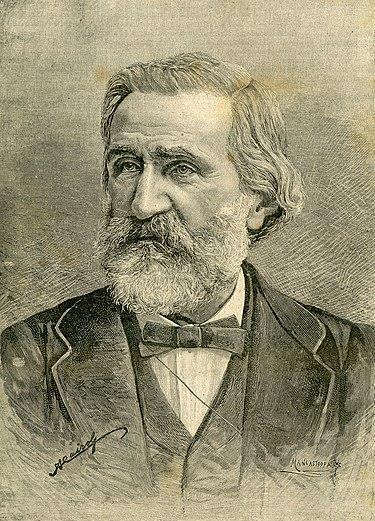

#### **Wolfgang Amadeus Mozart**
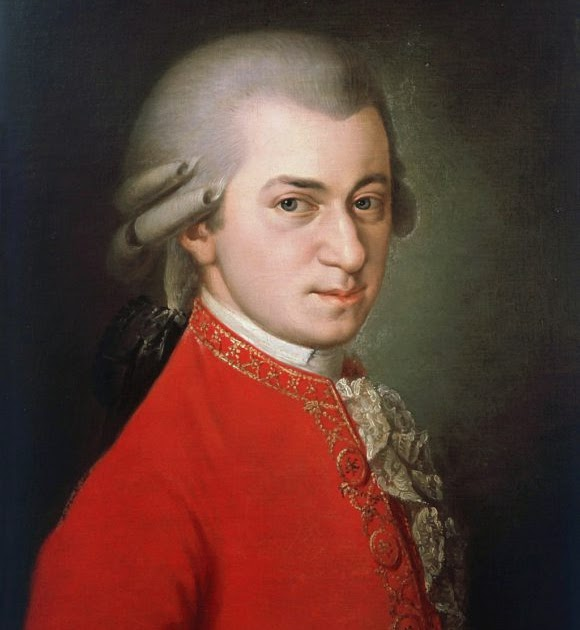

#### **Igor Stravinsky**
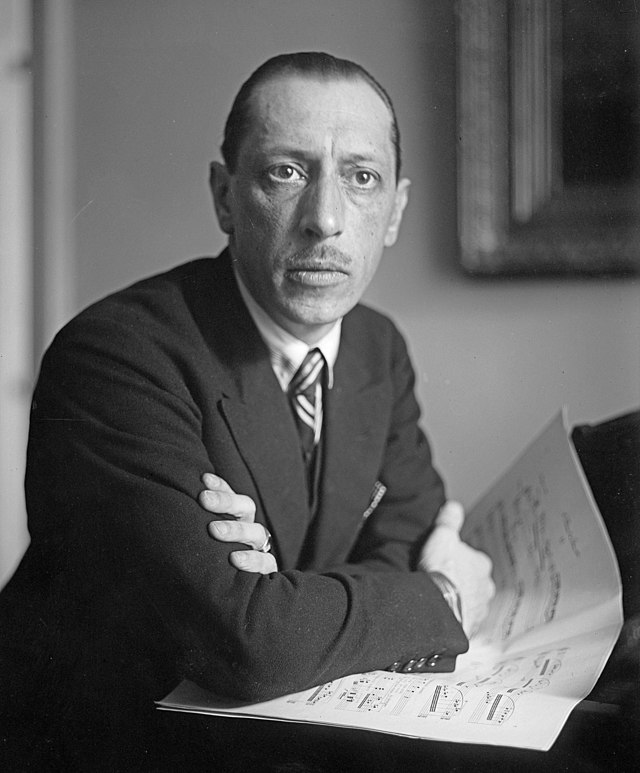

###Any suggestions by you?